In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import networkx as nx
import string

In [129]:
all_keys = 'RJjrLlRJjrLlRJjrJLjJRljLrlLlRJjrLJjlRJjJjJjJjrLlRrLlRJjJjJjJjJjJjJjJjrLJjlRJjJjJjrRJjrLlRJjrLlLJjlRJjJjJjJjrRJjrRJjrRJjrJRjrRJjJjJjJjJjJjJjJjJjJjJjrRJjJjrRJjrRrRrRrRJjrLlJRjJjJjJjrLJjJjRlJjJjrRJjrRJjJjJjJjJjJjJjrLlLlRJjrRJjJjrLlRJjrRrLlRrRJjJjrRrRJjJjrLJlRjrRJjrLlRJjrLJjJjJjlRJjLrlJRjJjJjJjJjJjJjrLlRrLJljRrLlJjRrRrLRlJrLjlRJjJjrRrLlLlRrRJjrJRjrRrRrRrJRjJjJjJjJjrLlRJjrRJjrRJjJjrRLrlRJjrLlJjRJjJjJjJjrJLjlRrLlRJrLljRJjJjJjrJRjrRJjJjrRJjJjrLJjlJLjlLlRrJjRJrjRJrjJRjJjJjJjJjJjrLlRrLlRrRrRJjrRrRrRrRJjrRJjrLlJjLlLlJjRrJjLJjlJjRJjJjJjJjJjJjrJRjJjrRJjJjJjrLlLJjlRrRrRJjrLlRrRrRrLlJjRrRrRrJjRrJjLJljLlRrLJjlRrLlRJrjJRrjLlLlRrRJjJrjLlJLjlJjRrLlRrJRjrLlRJrjLlLlJjJjRJjJjrLlRJjJjrRrJjRrRrRJjJjJjJjrLlRJjJjJjrRJjrRJjJjrRrRrRrRrRrJjJjRrJjRrJjRrJjRrJjRrRrLlRrLJljLlRrRrRrLlRJjJjJrRjJjJjJjrJjRJjJjJjrLJjlJjRrLJljRJjrRJjJjJjJjrJjJRjrJRjJjJjrLRlrLRlrRJrjRJjrRJjrRrJjJjRrJjRrJjJjRJjJjrRJjrRrRrRrJjRrJjRJjrRJjJjrLlRrRJrjRrJRjrRrRJjJjJjJjrRrRJjJjJjJjJjrRJjJjrJjRrLlRrJRjrLlRJjJjJjLrRlrLlLlRJjrRJjJjJjrRrLlLlRJjJjrLlLlLlLlRrJRjrJRjrLlRrLlRJjrLlRrJjRrLlRrRJjrRrLlRrRJjJjrRrLJjlRrRJrjLJRljrJRjrLRlrRJjJjJjJjJrLjlJRjrRrJLjlLlJjRrJjRJjJLrjlJLjlRJjrRrRJjJjJjJjrRJjrLlRJjJjrLlRJjrLJjJjlRrLlJLjlLlJjRJLrjlRJjJjJjJjJjJjJjJrjLlRJjJrjLlRrLlRJrRjJjJjJjrLlLlLlRrLlLlLlLlLlLlRJjrJjRJjJjJjJjJjrRrRJjJjJrjLJRljrRJjJjrLlRJLrljRrLJjlRrJjJjJjJjJjJjJjJLjlRJjJjrLlJjJjRrRJjrLlJjRJrLjlJRjrJjJjJRjrJjRJjJjJrjJjJjRJjJjrRrJjRrRrLJRljrRJjrLlRJjJjrRJjrJRrjRJrjLlRrRrRrRJrjRrJRjLrJjJjlRrLlJjRrJjLlRrRrRrJjRrJjJjJjJjJjRrRrJjRJjJjJjrLlRJjrJRjrRJrjRrRrRJjrRJjrLlRJjrLlRJjrLlJLjJjlLJjlRJjrRrRrRJjJjrJRjJjrRJjrRrJLjlRrRJjrLlJjRJLrjJjlRrRJjrLJjlRrRJrLjlRJjJjJjJjJjJjrJLjlJjRJjJjrLlRrLJjlRJjrRrRJjrRJjrRJjrRJjrRJrjRJjrRJjrLJjlLJjlRJjrRJrjLlRrLJjlRJjrRJjrJRjrRJrjRrRJrjRrLlRJrjLlRJjrJjJjJjJjJjRJrjJjRJjJjrLJjJjJjlRJjJrjRJjrRJrjRJrjRJjrRrRJjrJjJjJjRrJjJjJjRJrjRJrjJRjrJLjJjlLJjlRrJLjlRJjrLlJjRJLjrlRJLrlRjJjJjrLlRJjrRrLlRJjrLJjlLJjlRrRrRJjJjrRrJRrjRrRrRrRJjJjJjJjJjrRrJRrjRrRrRrRJjrLlRrRJjrJjLJjlRrJjRrLlRrRJjJjJjrLlLJjlRrLlJjJjRrJRjrLlRJjrLlRJjJjrRJjJjrRJjrRrRrJRjrRJjJjrLJjlJLjlLlLlLlLlRJrjRrRJjrRrLlRJjrJjRrRJjrLlLlLlLlLlLlLlLlLlRJjJjrRJjrRrRJjrLlLlLlLlRJjrRJjJjrRrRJjrLlLlLlRJjJjJjrLlRJjrLJjlRrJLjlRJjrJjRrJjRrRrJLjlRrRrJjLJjlRJjrLlJjRJjJjJjrLlRJjrLlJRjrJjRrJjRJrjRrLlJjRJjJjJjrLJjlLlRrRrRrRJjrLlRJjJjJjrRrRJrjRrLlRrRrRrRJrjLlLlRJjJjJjrLlRJjrRJjJjJjJjr'

table = str.maketrans('', '', string.ascii_lowercase)

pressed_only = all_keys.translate(table)

pressed_only


'RJLRJLRJJLJRLLRJLJRJJJJLRLRJJJJJJJJLJRJJJRJLRJLLJRJJJJRJRJRJJRRJJJJJJJJJJJRJJRJRRRRJLJRJJJLJJRJJRJRJJJJJJJLLRJRJJLRJRLRRJJRRJJLJRRJLRJLJJJRJLJRJJJJJJLRLJRLJRRLRJLRJJRLLRRJJRRRRJRJJJJLRJRJRJJRLRJLJRJJJJJLRLRJLRJJJJRRJJRJJLJJLLRJRJRJJRJJJJJLRLRRRJRRRRJRJLJLLJRJLJJRJJJJJJJRJRJJJLLJRRRJLRRRLJRRRJRJLJLRLJRLRJJRLLRRJJLJLJRLRJRLRJLLJJRJJLRJJRJRRRJJJJLRJJJRJRJJRRRRRJJRJRJRJRJRRLRLJLRRRLRJJJRJJJJRJJJLJJRLJRJRJJJJJJRJRJJLRLRRJRJRJRJJRJRJJRJJRJRRRJRJRJRJJLRRJRJRRRJJJJRRJJJJJRJJJRLRJRLRJJJLRLLRJRJJJRLLRJJLLLLRJRJRLRLRJLRJRLRRJRLRRJJRLJRRJLJRJRLRRJJJJJLJRRJLLJRJRJJLJLRJRRJJJJRJLRJJLRJLJJRLJLLJRJLRJJJJJJJJLRJJLRLRJRJJJLLLRLLLLLLRJJRJJJJJRRJJJLJRRJJLRJLRLJRJJJJJJJJLRJJLJJRRJLJRJLJRJJJRJRJJJJJRJJRJRRLJRRJLRJJRJJRRJLRRRRJRJRLJJRLJRJLRRRJRJJJJJRRJRJJJLRJJRRJRRRJRJLRJLRJLJLJLJRJRRRJJJRJRJRJLRRJLJRJLJRRJLJRRJLRJJJJJJJLJRJJLRLJRJRRJRJRJRJRJRJRJLJLJRJRJLRLJRJRJJRRJRRJRLRJLRJJJJJJRJJRJJLJJJRJJRJRJRJRJRRJJJJRJJJRJRJJRJLJLJRJLRJLJRJLRJLRJJLRJRLRJLJLJRRRJJRJRRRRRJJJJJRJRRRRRJLRRJJLJRJRLRRJJJLLJRLJJRJRLRJLRJJRJ

In [130]:
def getAllSubStrings(x, l=None, freq=False):
    if l == None:
        l = len(x)
    
    allSubStrings = [x[i:i+l] for i in range(0, len(x)) if len(x[i:i+l]) == l]

    if freq:
        return allSubStrings
    else:
        return set(allSubStrings)


def extract_freq(x, l=3, sort='value'):
    res = {}
    substrings = getAllSubStrings(pressed_only, l=l, freq=True)
    for idx in substrings:
        if idx not in res.keys():
            res[idx] = 1
        else:
            res[idx] += 1
    if sort == 'key':
        return dict(sorted(res.items(), key=lambda item: item[0], reverse=False))
    elif sort == 'value':
        return dict(sorted(res.items(), key=lambda item: item[1], reverse=True))


all_patterns = {}
for i in range(4, 11):
    all_patterns.update(extract_freq(pressed_only, l=i, sort='value'))
all_patterns = dict(sorted(all_patterns.items(), key=lambda item: item[1], reverse=True))
all_patterns

{'JJJJ': 70,
 'JRJR': 54,
 'RJRJ': 53,
 'JRJJ': 52,
 'RJJJ': 49,
 'JJRJ': 43,
 'JJJJJ': 42,
 'JLRJ': 34,
 'JRJRJ': 34,
 'RJJR': 33,
 'LJRJ': 29,
 'JRRJ': 29,
 'RJLR': 28,
 'RJJJJ': 28,
 'LRJJ': 27,
 'JLJR': 27,
 'JRJJJ': 27,
 'JJJR': 26,
 'RJLJ': 24,
 'JJJL': 24,
 'RJRJR': 24,
 'JJJJJJ': 24,
 'RJRJJ': 23,
 'JJLR': 22,
 'RRJJ': 22,
 'JJRJR': 21,
 'LRJL': 20,
 'RJRR': 20,
 'RJLRJ': 20,
 'RJJRJ': 20,
 'RJJL': 19,
 'JRJL': 19,
 'RRRJ': 19,
 'RRJL': 19,
 'RRJR': 19,
 'JLJRJ': 19,
 'JJJRJ': 19,
 'JJRJJ': 18,
 'RJJJJJ': 18,
 'RJRJRJ': 18,
 'JRLR': 17,
 'JLRJJ': 17,
 'JRJJR': 17,
 'JJLJ': 16,
 'RLRJ': 16,
 'JRJRJR': 16,
 'JJRR': 15,
 'LRJR': 15,
 'RJRL': 15,
 'RJLJR': 15,
 'JJJJR': 15,
 'JRJJJJ': 15,
 'JRJRJJ': 15,
 'JRRR': 14,
 'JRJRR': 14,
 'JJJJJJJ': 14,
 'LLLL': 13,
 'JJJLR': 13,
 'JJRRJ': 13,
 'JJLRJ': 13,
 'RJRLR': 13,
 'RJLJRJ': 13,
 'JRJRJRJ': 13,
 'LLRJ': 12,
 'RRRR': 12,
 'LRRJ': 12,
 'RLJR': 12,
 'JJJJL': 12,
 'RJJJL': 12,
 'JRRJL': 12,
 'RJLRJJ': 12,
 'RJJRJR': 12,
 'JLRL': 11,
 'L

In [128]:
def getSizeNOnly(pattern_dict, size):
    return {k:v for (k,v) in pattern_dict.items() if len(k) == size}
    

In [123]:

G = nx.DiGraph()

nodes_subset = dict()

for pattern, occur in getSizeNOnly(all_patterns, 4).items():
    for i in range(len(pattern)-1):
        if(G.has_edge(pattern[i] + '_' + str(i), pattern[i+1]+ '_' + str(i+1))):
            G[pattern[i] + '_' + str(i)][pattern[i+1]+ '_' + str(i+1)]["weight"] += (occur/5)
        else:
            G.add_edge(pattern[i] + '_' + str(i), pattern[i+1]+ '_' + str(i+1), weight=occur/5)

    for i in range(len(pattern)):
        if((pattern[i] + '_' + str(i)) not in nodes_subset.keys()):
            nodes_subset[pattern[i] + '_' + str(i)] = {'subset': i}

nx.set_node_attributes(G, nodes_subset)

{('J_0', 'J_1'): 3.1999999999999997, ('J_0', 'R_1'): 1.6, ('J_0', 'L_1'): 1.5999999999999999, ('J_1', 'J_2'): 3.4000000000000004, ('J_1', 'L_2'): 1.5999999999999999, ('J_1', 'R_2'): 1.5999999999999999, ('J_2', 'J_3'): 3.4, ('J_2', 'L_3'): 1.4, ('J_2', 'R_3'): 1.7999999999999998, ('R_1', 'J_2'): 2.4, ('R_1', 'L_2'): 0.4, ('R_0', 'J_1'): 2.6, ('R_0', 'L_1'): 0.4, ('L_2', 'R_3'): 1.2, ('L_2', 'J_3'): 0.8, ('L_2', 'L_3'): 0.4, ('L_1', 'R_2'): 1.2, ('L_1', 'J_2'): 0.8, ('L_1', 'L_2'): 0.4, ('R_2', 'J_3'): 2.4000000000000004, ('R_2', 'L_3'): 0.4, ('L_0', 'R_1'): 1.2, ('L_0', 'J_1'): 0.8, ('L_0', 'L_1'): 0.4}


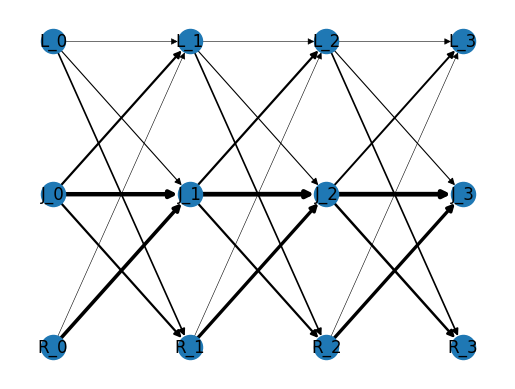

In [124]:
fig, ax = plt.subplots()
pos=nx.multipartite_layout(G) # pos = nx.nx_agraph.graphviz_layout(G)

for name, coord in pos.items():
    if(name[0] == 'R'):
        pos[name][1] = -1 
    if(name[0] == 'J'):
        pos[name][1] = 0 
    if(name[0] == 'L'):
        pos[name][1] = 1

widths = [w for w in nx.get_edge_attributes(G, 'weight').values()]
print(nx.get_edge_attributes(G, 'weight'))
nx.draw_networkx(G, pos, ax=ax, width=widths)

ax.set_axis_off()
plt.show()

{('J_0', 'J_1'): 232, ('J_0', 'R_1'): 200, ('J_0', 'L_1'): 116, ('J_1', 'J_2'): 233, ('J_1', 'R_2'): 200, ('J_1', 'L_2'): 116, ('J_2', 'J_3'): 234, ('J_2', 'R_3'): 200, ('J_2', 'L_3'): 115, ('R_1', 'J_2'): 247, ('R_1', 'R_2'): 98, ('R_1', 'L_2'): 48, ('R_0', 'J_1'): 248, ('R_0', 'R_1'): 98, ('R_0', 'L_1'): 48, ('R_2', 'J_3'): 247, ('R_2', 'R_3'): 98, ('R_2', 'L_3'): 48, ('L_1', 'R_2'): 95, ('L_1', 'J_2'): 69, ('L_1', 'L_2'): 42, ('L_0', 'J_1'): 69, ('L_0', 'R_1'): 95, ('L_0', 'L_1'): 42, ('L_2', 'R_3'): 95, ('L_2', 'J_3'): 69, ('L_2', 'L_3'): 42}


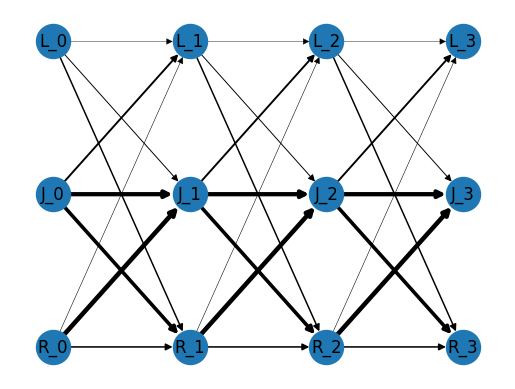

In [172]:
#pattern_occur is a dict with the following formar --> {str(pattern): n_occur, ...}
#draws multipartite graph
def drawGraphFromPatterns(pattern_occur: dict, size_pattern: int):

    G = nx.DiGraph()
    nodes_subset = dict()


    for k, v in getSizeNOnly(pattern_occur, size_pattern).items():
        for i in range(len(k)-1):
            if(G.has_edge(k[i] + '_' + str(i), k[i+1]+ '_' + str(i+1))):
                G[k[i] + '_' + str(i)][k[i+1]+ '_' + str(i+1)]["weight"] += v
            else:
                G.add_edge(k[i] + '_' + str(i), k[i+1]+ '_' + str(i+1), weight=v)

        for i in range(len(k)):
            if((k[i] + '_' + str(i)) not in nodes_subset.keys()):
                nodes_subset[k[i] + '_' + str(i)] = {'subset': i}


    nx.set_node_attributes(G, nodes_subset)

    fig, ax = plt.subplots()
    
    pos=nx.multipartite_layout(G)

    for name, coord in pos.items():
        if(name[0] == 'R'):
            pos[name][1] = -1 
        if(name[0] == 'J'):
            pos[name][1] = 0 
        if(name[0] == 'L'):
            pos[name][1] = 1
    
    weights = nx.get_edge_attributes(G, 'weight').values()
    widths = [3*(((w-min(weights))/(max(weights)-min(weights)))+0.1) for w in weights]

    print(nx.get_edge_attributes(G, 'weight'))
    nx.draw_networkx(G, pos, ax=ax, node_size=600, width=widths)

    ax.set_axis_off()
    plt.show()

drawGraphFromPatterns(all_patterns, 4)

In [149]:
min(nx.get_edge_attributes(G, 'weight').values())

0.5999999999999998